<a href="https://colab.research.google.com/github/ashamril/FYP-RUS_GWO_PSO_Machine_Learning/blob/master/2a_SGCC_RUS_Classification_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Electricity fraud prediction using supervised machine learning
# ANN, SVM, XGBoost and RF
# Undersampling/balancing using RUS
# Author  : Ami
# Email   : ashamril@gmail.com

from datetime import datetime 
from google.colab import drive
from pytz import timezone  
from random import randint
from scipy import spatial
from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, average_precision_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.spatial
import time
import warnings 

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !wget -O sgcc_dataset.csv https://www.dropbox.com/s/qoijcmitc881tkv/sgcc-no-missing-values-v4.csv?dl=0                    # Set1
# #!wget -O sgcc_dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/sgcc-no-missing-values_df_months.csv     # Set2

In [4]:
malaysia = timezone('Asia/Kuala_Lumpur')
mytime = datetime.now(malaysia)
first_start_time = datetime.now() 
start_time = datetime.now() 
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values-v4.csv"                             # Set1
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-quantile.csv"           # Set2
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-zscore.csv"             # Set3
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_RobustScaler.csv"                   # Set4
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_df_months.csv"                      # Set5
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_normal.csv"     # Set6
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_uniform.csv"    # Set7
#file_path = "/content/drive/My Drive/data/CSV/blood_transfusion.csv"                                     # Set8
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_PowerTransformer.csv"               # Set9
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean.csv"                                    # Set10
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_50percent_zero.csv"                     # Set11
file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_with_zero.csv"                           # Set12
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_90percent_zero.csv"                     # Set13
dataset_ori = pd.read_csv(file_path)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

dataset_set = "Set12"
program_name = "RUS"

Time elapsed (hh:mm:ss.ms) 0:00:03.703370


In [5]:
dataset_ori

,Unnamed: 0,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,...,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,CONS_NO
0,0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74,0387DD8A07E07FDA6271170F86AD9151
1,1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,...,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72,EDFC78B07BA2908B3395C4EB2304665E
2,2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,...,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40,34C1954AA3703C4F8BD8EAEA7C4B7B83
3,3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,...,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91,768309B0EB11FD436CEE5ABFB84F4C0C
4,4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,...,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36,516954F5FF177CE314656D727FCC66A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50,8C32EE3B1C2B5EAFC0DCCCD4700BD5FF
23845,23846,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [0]:
# malaysia = timezone('Asia/Kuala_Lumpur')
# mytime = datetime.now(malaysia)
# first_start_time = datetime.now() 
# start_time = datetime.now() 
# dataset_ori = pd.read_csv('/content/sgcc_dataset.csv')
# print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# dataset_set = "Set1"
# program_name = "RUS"

In [7]:
# Drop Unnamed and CONS_NO columns
dataset = dataset_ori.iloc[:,1:-1]
dataset

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,...,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,3.02,...,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,1.02,...,3.19,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,5.57,...,62.96,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.34,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50
23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,152.39,158.13,229.34,226.53,188.67,251.22,223.88,184.34,205.44,290.41,268.83,291.32

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


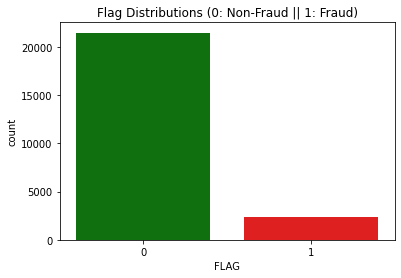

Original dataset:
No Frauds 89.93 % of the dataset: 21447
Frauds 10.07 % of the dataset: 2402


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["green", "red"]
sns.countplot('FLAG', data=dataset, palette=colors)
plt.title('Flag Distributions (0: Non-Fraud || 1: Fraud)')

plt.show()

print("Original dataset:")
print('No Frauds', round(dataset['FLAG'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset:', dataset['FLAG'].value_counts()[0])
print('Frauds', round(dataset['FLAG'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset:', dataset['FLAG'].value_counts()[1])

In [0]:
# Separating the dependent and independent variables 

X = dataset.drop('FLAG', axis = 1) 
#X = X.drop('Total_Consumption', axis = 1) 
y = dataset['FLAG'] 

In [0]:
# # Separating train, validation and test set then RUS 

# # Separating train, validation and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=49)

# print("Before RUS:")
# print("X_train:", X_train.shape, "Flag 1: ", y_train[y_train == 1].count(), "Flag 0: ", y_train[y_train == 0].count())
# print("X_test:", X_test.shape, "Flag 1: ", y_test[y_test == 1].count(), "Flag 0: ", y_test[y_test == 0].count())

# # Count total of FLAG 0 and 1
# cnt_flag0 = dataset[dataset.FLAG == 0].count()[0]
# cnt_flag1 = dataset[dataset.FLAG == 1].count()[0]

# # RUS
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.under_sampling import NearMiss
# from imblearn.under_sampling import CondensedNearestNeighbour
# from imblearn.under_sampling import TomekLinks
# from imblearn.under_sampling import EditedNearestNeighbours
# from imblearn.under_sampling import OneSidedSelection
# from imblearn.under_sampling import NeighbourhoodCleaningRule
# from imblearn.under_sampling import ClusterCentroids
# from imblearn.under_sampling import AllKNN
# from collections import Counter

# rus = RandomUnderSampler(random_state=47)
# #rus = NearMiss(version=1, n_neighbors=3) # NearMiss(version=2, n_neighbors=3)
# #rus = CondensedNearestNeighbour(n_neighbors=1)
# #rus = TomekLinks()
# #rus = EditedNearestNeighbours(n_neighbors=3)
# #rus = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# #rus = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# #rus = ClusterCentroids(random_state=0)
# #rus = AllKNN()
# X_rus, y_rus = rus.fit_resample(X, y)

# X_rus = pd.DataFrame(X_rus, columns = X_train.columns)
# y_rus = pd.DataFrame(y_rus)
# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.1, random_state=49)

# print("")
# print('Resampled dataset shape %s' % Counter(y_rus))
# print("After RUS:")
# print("X_train:", X_train.shape, "Flag 1: ", y_train[y_train == 1].count()[0], "Flag 0: ", y_train[y_train == 0].count()[0])
# print("X_test:", X_test.shape, "Flag 1: ", y_test[y_test == 1].count()[0], "Flag 0: ", y_test[y_test == 0].count()[0])

In [11]:
# RUS then Separating train, validation and test set

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import AllKNN
from collections import Counter

rus = RandomUnderSampler(random_state=47)
#rus = NearMiss(version=1, n_neighbors=3) # NearMiss(version=2, n_neighbors=3)
#rus = CondensedNearestNeighbour(n_neighbors=1)
#rus = TomekLinks()
#rus = EditedNearestNeighbours(n_neighbors=3)
#rus = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
#rus = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
#rus = ClusterCentroids(random_state=0)
#rus = AllKNN()

# RUS
start_time = datetime.now() 
X_rus, y_rus = rus.fit_resample(X, y)
print("")
print('Resampled dataset shape %s' % Counter(y_rus))

print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

X_rus = pd.DataFrame(X_rus)
y_rus = pd.Series(y_rus)

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=49)

# Count total of FLAG 0 and 1
cnt_flag0 = dataset[dataset.FLAG == 0].count()[0]
cnt_flag1 = dataset[dataset.FLAG == 1].count()[0]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



Resampled dataset shape Counter({0: 2402, 1: 2402})
Time elapsed (hh:mm:ss.ms) 0:00:00.066881


After RUS :
X_train:
No Frauds 50.17 % of the dataset: 1928
Frauds 49.83 % of the dataset: 1915

X_test:
No Frauds 49.32 % of the dataset: 474
Frauds 50.68 % of the dataset: 487



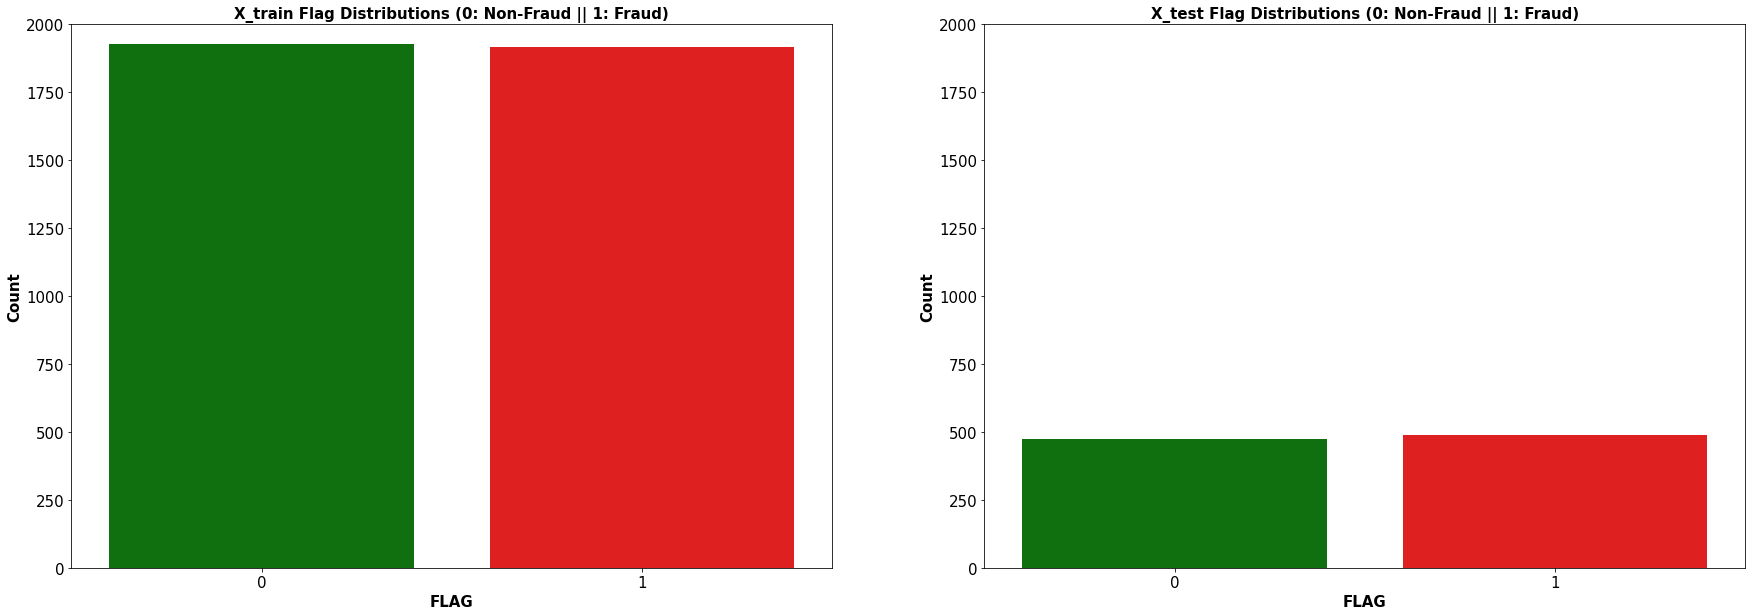

In [12]:
# Plotting the sets

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_train Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_test Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

print("After", program_name, ":")
print("X_train:")
print('No Frauds', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Frauds', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('No Frauds', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Frauds', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [0]:
# mlp_best_result = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
#               beta_2=0.999, early_stopping=False, epsilon=1e-08,
#               hidden_layer_sizes=(10, 24), learning_rate='constant',
#               learning_rate_init=0.09, max_fun=15000, max_iter=1500,
#               momentum=0.9, n_iter_no_change=80, nesterovs_momentum=True,
#               power_t=0.5, random_state=None, shuffle=True, solver='sgd',
#               tol=0.0001, validation_fraction=0.1, verbose=False,
#               warm_start=False)

In [0]:
# svc_best_result = SVC(C=10.0, break_ties=False, cache_size=200, class_weight='balanced',
#     coef0=0.0, decision_function_shape='ovr', degree=1.0, gamma='scale',
#     kernel='rbf', max_iter=-1, probability=True, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [0]:
# xgboost_best_result = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1.0, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=9,
#               min_child_weight=6.0, missing=None, n_estimators=100, n_jobs=1,
#               nthread=4, objective='binary:logistic', random_state=0,
#               reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1.0, seed=27,
#               silent=None, subsample=0.7, verbosity=1)

In [0]:
# rf_best_result = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
#                        criterion='gini', max_depth=30, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=10,
#                        min_weight_fraction_leaf=0.0, n_estimators=600,
#                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                        warm_start=False)

In [0]:
# Classifiers with default parameters
from sklearn import tree
mlp_best_result = MLPClassifier()
svc_best_result = SVC(probability=True)
xgboost_best_result = XGBClassifier()
rf_best_result = RandomForestClassifier()
#rf_best_result = tree.DecisionTreeClassifier()

In [18]:
# Print results performance for all classifiers using Train and Test set
from sklearn.metrics import precision_recall_fscore_support as score

start_time = datetime.now() 

# With GA
#print("Best Classifiers:\n", mlp_best_result, "\n", svc_best_result, "\n", xgboost_best_result, "\n", rf_best_result, "\n")
classifiers = [mlp_best_result, 
               svc_best_result, 
               xgboost_best_result, rf_best_result]

# Without GA
#classifiers = [MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50), activation='relu', solver='sgd', max_iter=2000, learning_rate='constant'), 
#               SVC(kernel='linear', probability=True), 
#               XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
#               RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=10, random_state=0)]

# Define a result table as a DataFrame
result_table_train = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_train_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

# TRAIN set
    yproba = model.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    result_table_train = result_table_train.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("===========================================================================================")
    print("Classifier = ", cls)
    print("TRAIN SET")
    y_pred = cls.predict(X_train)
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    accuracy = accuracy_score(y_train, y_pred)
    #f1score = f1_score(y_train, y_pred, average='weighted')
    f1score = f1_score(y_train, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_train, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall : ", average_precision)
    print("")
    report = classification_report(y_train, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TRAIN'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    #result_table_train2 = result_table_train2.append({'Classifiers':cls.__class__.__name__,
    result_table_train_f1 = result_table_train_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)

    precision, recall, fscore, support = score(y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))

# TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table_test = result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    #f1score = f1_score(y_test, y_pred, average='weighted')
    # For imbalanced class problems:
    # Use micro-averaging to weight your metric towards the largest one.
    # Use macro-averaging to weight your metric towards the smallest one
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall : ", average_precision)
    print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TEST'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    result_table_test_f1 = result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))

# Set name of the classifiers as index labels
result_table_train.set_index('classifiers', inplace=True)
#result_table_train_f1.set_index('Classifiers', inplace=True)

# Set name of the classifiers as index labels
result_table_test.set_index('classifiers', inplace=True)
#result_table_test_f1.set_index('Classifiers', inplace=True)

print('All Classifiers elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
print(mytime)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TRAIN SET
[[1659  269]
 [ 325 1590]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1928
           1       0.86      0.83      0.84      1915

    accuracy                           0.85      3843
   macro avg       0.85      0.85      0.85      3843
weighted avg       0.85      0.85      0.85      3843

Accuracy :  0.8454332552693209
F1 Score :  0.8453834111990013
AUC :  0.9160677334431165
Average 

In [0]:
# # Results performance bar plot
# # ORI
# color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
# # #FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# # Function plotting the results performance
# def plot_result(result_table, result_set):
#   print('RUS', result_set, 'set result:\n', result_table)
#   fig, ax = plt.subplots(1, 4, figsize=(30, 5))
#   result_table = result_table[::-1]
#   y_pos = result_table.Classifiers

#   plt.subplot(1, 4, 1)
#   ax = plt.barh(y_pos, result_table.Accuracy, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('RUS {} set: Accuracy'.format(result_set))
#   i = 0
#   label = np.round(result_table.Accuracy.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1

#   plt.subplot(1, 4, 2)
#   plt.barh(y_pos, result_table.F1Score, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('RUS {} set: F1 Score'.format(result_set))
#   i = 0
#   label = np.round(result_table.F1Score.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1

#   plt.subplot(1, 4, 3)
#   plt.barh(y_pos, result_table.AUC, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('RUS {} set: AUC'.format(result_set))
#   i = 0
#   label = np.round(result_table.AUC.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1
  
#   plt.subplot(1, 4, 4)
#   plt.barh(y_pos, result_table.AveragePrecisionRecall, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('RUS {} set: Average Precision Recall'.format(result_set))
#   i = 0
#   label = np.round(result_table.AveragePrecisionRecall.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1
#   plt.show()
#   print("")

# plot_result(result_table_train_f1, "Train")
# plot_result(result_table_test_f1, "Test")

RUS Train set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.845433  0.845383  0.916068                0.794713
SVC          0.594848  0.534269  0.690133                0.576312
XGB          0.855321  0.854620  0.937415                0.822215
Ran          1.000000  1.000000  1.000000                1.000000


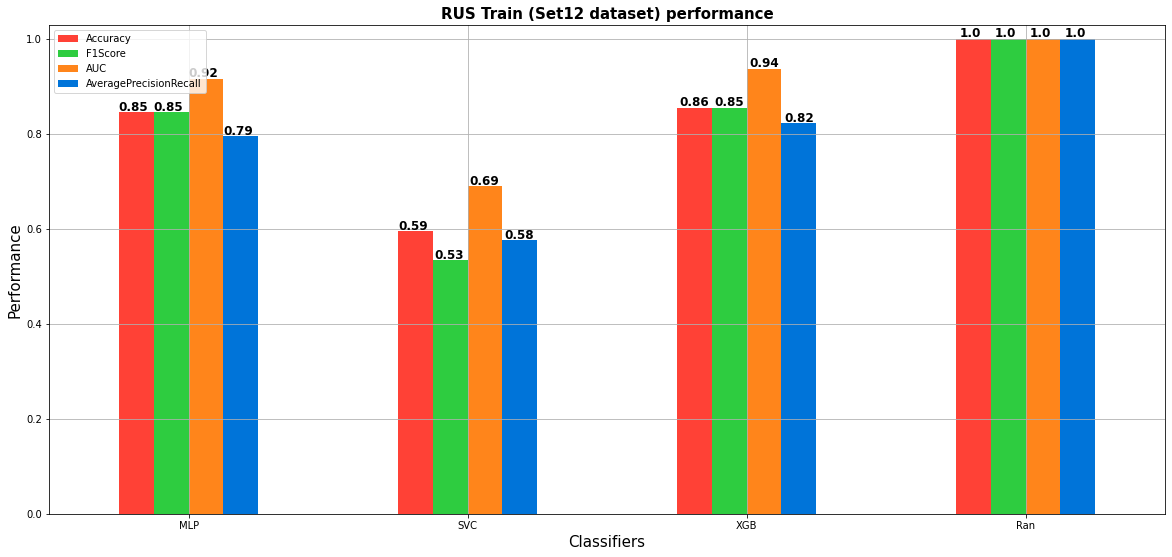


RUS Test set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.696150  0.696005  0.745631                0.645457
SVC          0.590010  0.532523  0.668144                0.585316
XGB          0.734651  0.733613  0.793660                0.688114
Ran          0.745057  0.745047  0.799134                0.688613


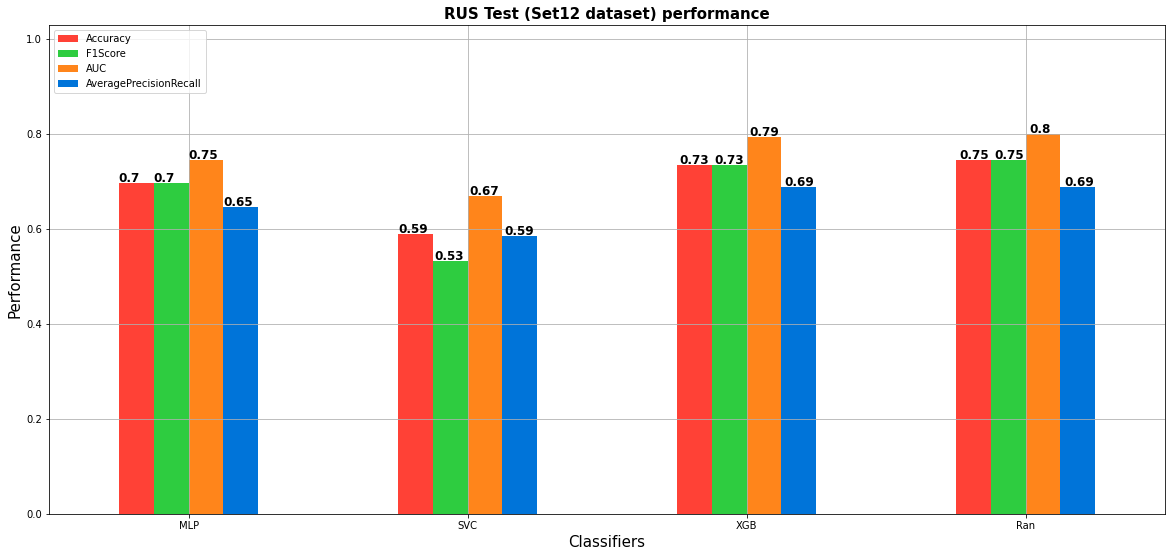

In [20]:
# Results performance bar plot

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set):
  result_table = result_table.set_index('Classifiers')
  print(program_name, result_set, 'set result:\n', result_table)
  #ax = result_table.loc[:,['Accuracy','F1Score', 'AUC', 'AveragePrecisionRecall']].plot.bar(color=color, figsize=(20, 9))
  ax = result_table.plot.bar(color=color, figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.ylabel("Performance", fontsize=15)
  plt.xlabel("Classifiers", fontsize=15)
  plt.ylim(0, 1.03)
  plt.grid(True)
  plt.legend(loc=2)
  plt.title('{} {} ({} dataset) performance'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(result_table_train_f1, "Train")
plot_result(result_table_test_f1, "Test")

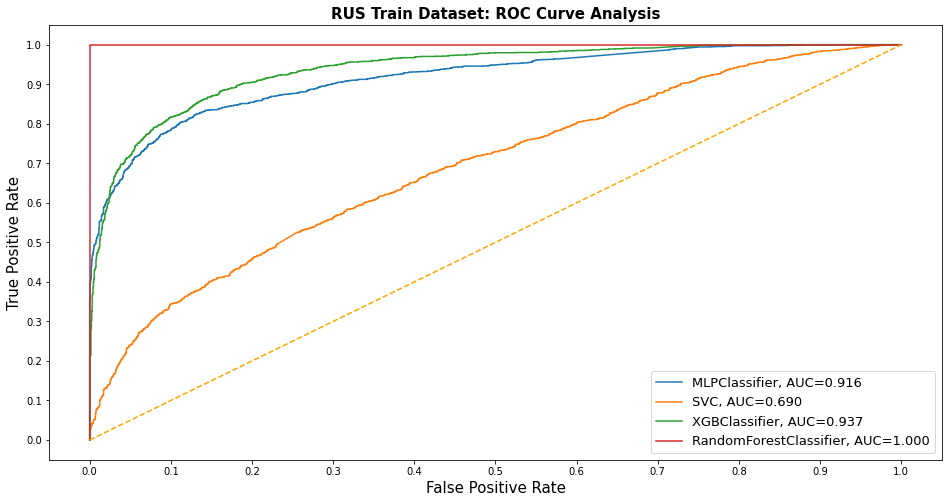

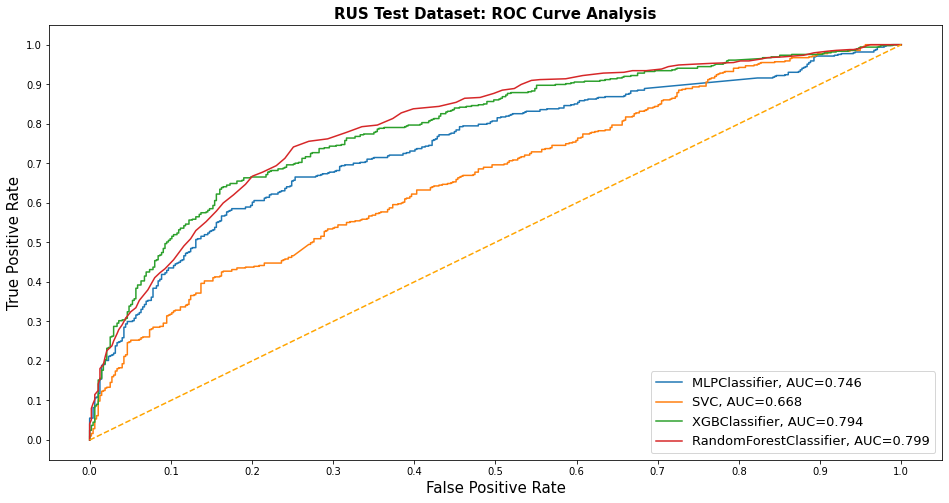

In [21]:
# Plotting ROC/AUC

# Function plotting AUC
def plot_roc(result_table, result_set):
  fig1 = plt.figure(1, figsize=(16,8))
  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  #plt.title('{} {} ({} dataset): ROC Curve Analysis'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  plt.title('RUS {} Dataset: ROC Curve Analysis'.format(result_set), fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()
  #fig.savefig('multiple_roc_curve.png')

plot_roc(result_table_train, "Train")
plot_roc(result_table_test, "Test")

In [22]:
print('TOTAL elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - first_start_time))
print(mytime)
print("ALL DONE")

TOTAL elapsed (hh:mm:ss.ms) 0:03:54.641119
2020-06-07 13:48:37.345687+08:00
ALL DONE
